# 1. Problem Statement

###  *How can we leverage AI-driven solutions to accurately forecast resale flat prices in Singapore's public housing market, incorportating the impact of nearby amenities to address the need for precision amidst market fluctuations?*

## 2. Data Acquisition

We got the dataset from **Kaggle**, an open source. It contains Singapore Housing and Development Board Resale Flat Prices from the year **2017 to 2023.**


NEED TO ADD IN INFO ABT ADDITIONAL DATASETS

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# load dataset
df = pd.read_csv('final_merged_dataset.csv')

# print data types of variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155821 entries, 0 to 155820
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     155821 non-null  int64  
 1   Town                      155821 non-null  object 
 2   FlatType                  155821 non-null  object 
 3   Block                     155821 non-null  object 
 4   Street                    155821 non-null  object 
 5   StoreyRange               155821 non-null  object 
 6   FloorAreaSqm              155821 non-null  float64
 7   FlatModel                 155821 non-null  object 
 8   LeaseCommenceDate         155821 non-null  int64  
 9   RemainingLease            155821 non-null  object 
 10  Price                     155821 non-null  float64
 11  Year                      155821 non-null  int64  
 12  Month                     155821 non-null  int64  
 13  Address                   155821 non-null  o

## 3. Data Exploration - Exploratory Data Analysis (EDA)

This stage is a crucial stage in the **AI Project Lifecycle** to *uncover insights* from visualising the dataset. In the next few code blocks, we will be looking at what the dataset contains and visualising the different variables. 

**Variable Identification**: 
- **Predictor variables (Input)**
    - Month
    - Town
    - Public Housing Flat Type
    - Block
    - Street
    - Storey Range
    - Area
    - Flat Model
    - Lease Commence Date
    - Remaining Lease
    - Price
    - Year
    - Address 
    - Latitude
    - Longitude
    - Postal
    - Max Floor Level
    - Year Completed
    - Market Hawker
    - Multistorey Carpark
    - Total Dwelling Units
    - Nearest MRT
    - Distance From MRT
    - MRT Distribution
    - Nearest Hawker Centre
    - Distance From Hawker Centre
    - Hawker Centre Distribution
    - Nearest School
    - Distance From School
    - School Distribution
    - Nearest Shopping Mall
    - Distance From Shopping Mall
    - Shopping Mall Distribution

- **Target Variable (Output)**: Resale Price in Singapore Dollars

In [3]:
# Display first 5 data rows
df.head()

,Index,Town,FlatType,Block,Street,StoreyRange,FloorAreaSqm,FlatModel,LeaseCommenceDate,RemainingLease,...,MRTDistribution,NearestHawkerCentre,DistanceFromHawkerCentre,HawkerCentreDistribution,NearestSchool,DistanceFromSchool,SchoolDistribution,NearestShoppingMall,DistanceFromShoppingMall,ShoppingMallDistribution
0,0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,More than-1km,Blk 409 Ang Mo Kio Ave 10,0.17241064129214373 km,within-1km,Townsville Primary School,0.2181254395256675 km,within-1km,AMK Hub,1.003018118556015 km,More than-1km
1,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,More than-1km,Blk 724 Ang Mo Kio Ave 6,0.9341909181314921 km,within-1km,Ang Mo Kio Primary School,0.2415753425097763 km,within-1km,Broadway Plaza,0.868861431290418 km,within-1km
2,2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,More than-1km,Sembawang Hill Food Centre,1.166164248332101 km,More than-1km,Anderson Primary School,0.7771571662417865 km,within-1km,Broadway Plaza,1.5255730377820635 km,More than-1km
3,3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,...,within-1km,Blk 409 Ang Mo Kio Ave 10,0.4462404690664215 km,within-1km,Teck Ghee Primary School,0.6981684698310231 km,within-1km,myVillage At Serangoon Garden,0.8937956343800417 km,within-1km
4,4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,More than-1km,Sembawang Hill Food Centre,1.1802560030151612 km,More than-1km,Anderson Primary School,0.7825550706448622 km,within-1km,Broadway Plaza,1.5693068531867669 km,More than-1km


In [4]:
# Display summary statistics
print(df.describe())

               Index   FloorAreaSqm  LeaseCommenceDate         Price  \
count  155821.000000  155821.000000      155821.000000  1.558210e+05   
mean    77910.000000      97.477862        1995.668087  4.835541e+05   
std     44981.792485      24.046407          13.823952  1.671764e+05   
min         0.000000      31.000000        1966.000000  1.400000e+05   
25%     38955.000000      82.000000        1985.000000  3.600000e+05   
50%     77910.000000      94.000000        1996.000000  4.515000e+05   
75%    116865.000000     113.000000        2008.000000  5.750000e+05   
max    155820.000000     249.000000        2019.000000  1.500000e+06   

                Year          Month       Latitude      Longitude  \
count  155821.000000  155821.000000  155492.000000  155492.000000   
mean     2019.954865       6.484851       1.367908     103.841995   
std         1.862432       3.405119       0.042783       0.071007   
min      2017.000000       1.000000       1.270380     103.685228   
25%   

In [5]:
# Check for missing values
print(df.isnull().sum())

Index                         0
Town                          0
FlatType                      0
Block                         0
Street                        0
StoreyRange                   0
FloorAreaSqm                  0
FlatModel                     0
LeaseCommenceDate             0
RemainingLease                0
Price                         0
Year                          0
Month                         0
Address                       0
Latitude                    329
Longitude                   329
Postal                      329
MaxFloorLevel                 0
YearCompleted                 0
MarketHawker                  0
MultistoreyCarpark            0
TotalDwellingUnits            0
RemainingLeaseINT             0
StoreyRangeINT                0
NearestMRT                  329
DistanceFromMRT             329
MRTDistribution             329
NearestHawkerCentre         329
DistanceFromHawkerCentre    329
HawkerCentreDistribution    329
NearestSchool               329
Distance

In [6]:
#convert Remaining Lease to Decimal
# Extract years and months from RemainingLease
df['years_remaining'] = df['RemainingLease'].str.extract('(\d+) years').astype(float)
df['months_remaining'] = df['RemainingLease'].str.extract('(\d+) months').astype(float)

# Convert years and months to decimal
df['months_remaining'].fillna(0, inplace=True)
df['decimal_remaining_lease'] = df['years_remaining'] + df['months_remaining'] / 12
print(df.head())


   Index        Town FlatType Block             Street StoreyRange  \
0      0  ANG MO KIO   2 ROOM   406  ANG MO KIO AVE 10    10 TO 12   
1      1  ANG MO KIO   3 ROOM   108   ANG MO KIO AVE 4    01 TO 03   
2      2  ANG MO KIO   3 ROOM   602   ANG MO KIO AVE 5    01 TO 03   
3      3  ANG MO KIO   3 ROOM   465  ANG MO KIO AVE 10    04 TO 06   
4      4  ANG MO KIO   3 ROOM   601   ANG MO KIO AVE 5    01 TO 03   

   FloorAreaSqm       FlatModel  LeaseCommenceDate      RemainingLease  ...  \
0          44.0        Improved               1979  61 years 04 months  ...   
1          67.0  New Generation               1978  60 years 07 months  ...   
2          67.0  New Generation               1980  62 years 05 months  ...   
3          68.0  New Generation               1980   62 years 01 month  ...   
4          67.0  New Generation               1980  62 years 05 months  ...   

   HawkerCentreDistribution              NearestSchool     DistanceFromSchool  \
0                within

### Univariate Analysis - Exploration of variables one by one

- Visualisation of Categorical variables - understand the distribution of each variable.
- Visualisation of Continuous variables - understand the central tendency and spread of the variable.

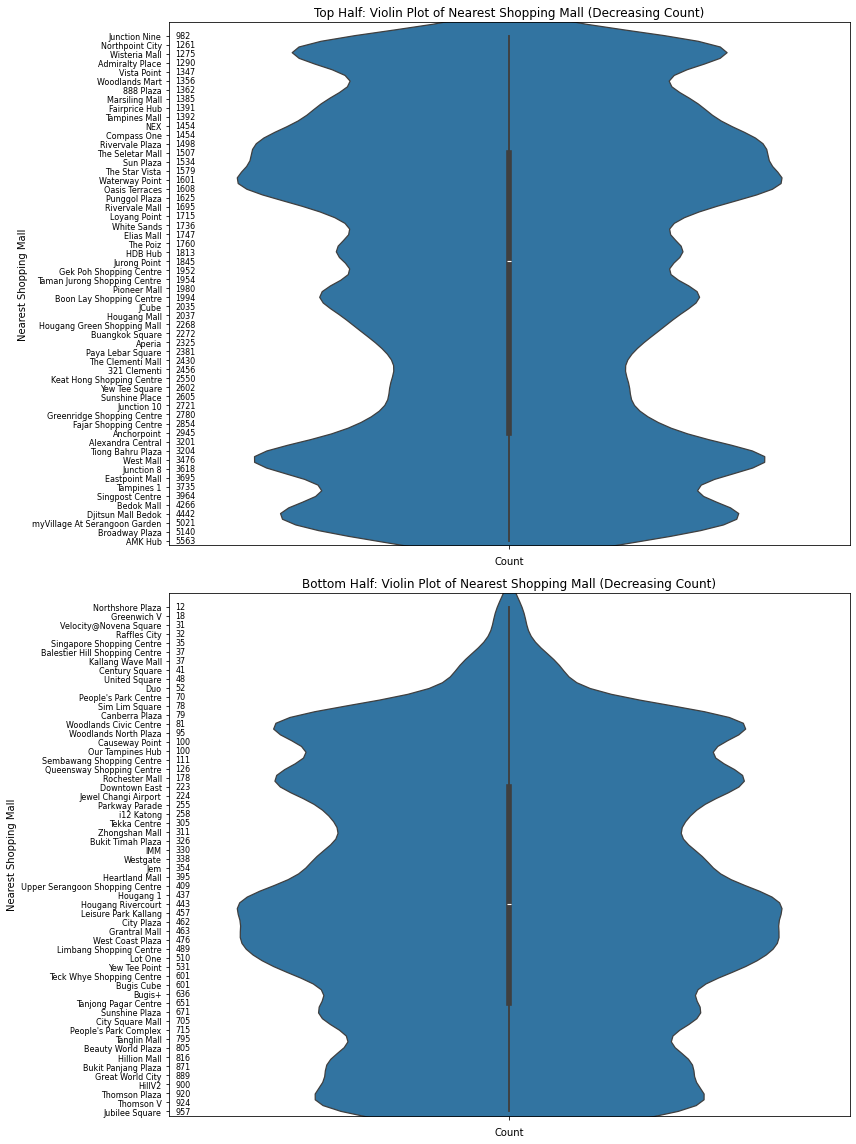

In [7]:
# Violin plot for Nearest Shopping Mall - Categorical variable
# A violin plot displays the distribution of data across categories using the width to represent density 
# Kernel density estimate to show the overall shape
# White dot/mark represents the median of the data
# Rectangle/Box represents the Interquartile Range (IQR) - 25th percentile to the 75th percentile
# Whiskers represents range of the data beyond the IQR (excluding outliers)


sorted_counts = df['NearestShoppingMall'].value_counts().sort_values(ascending=False)

# Split the sorted data into two halves for better readability
half_point = len(sorted_counts) // 2
top_half = sorted_counts[:half_point]
bottom_half = sorted_counts[half_point:]

# Create two separate plots to prevent axes label overlapping
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot top half
sns.violinplot(y=df[df['NearestShoppingMall'].isin(top_half.index)]['NearestShoppingMall'], ax=axes[0])
axes[0].set_title('Top Half: Violin Plot of Nearest Shopping Mall (Decreasing Count)')
axes[0].set_ylabel('Nearest Shopping Mall')
axes[0].set_xlabel('Count')
axes[0].tick_params(axis='y', labelsize=8)  
axes[0].set_ylim(-0.5, len(top_half) + 0.5)  

# Add annotations for count on violins
for i, (mall, count) in enumerate(top_half.items()):
    axes[0].text(-0.49, i, f'{count}', verticalalignment='center', fontsize=8) 

# Plot bottom half
sns.violinplot(y=df[df['NearestShoppingMall'].isin(bottom_half.index)]['NearestShoppingMall'], ax=axes[1])
axes[1].set_title('Bottom Half: Violin Plot of Nearest Shopping Mall (Decreasing Count)')
axes[1].set_ylabel('Nearest Shopping Mall')
axes[1].set_xlabel('Count')
axes[1].tick_params(axis='y', labelsize=8) 
axes[1].set_ylim(-0.5, len(bottom_half) + 0.5)  

# Add annotations for count on violins
for i, (mall, count) in enumerate(bottom_half.items()):
    axes[1].text(-0.49, i, f'{count}', verticalalignment='center', fontsize=8)  

plt.tight_layout()
plt.show()




### Bivariate Analysis - Exploration of relationship between two variables

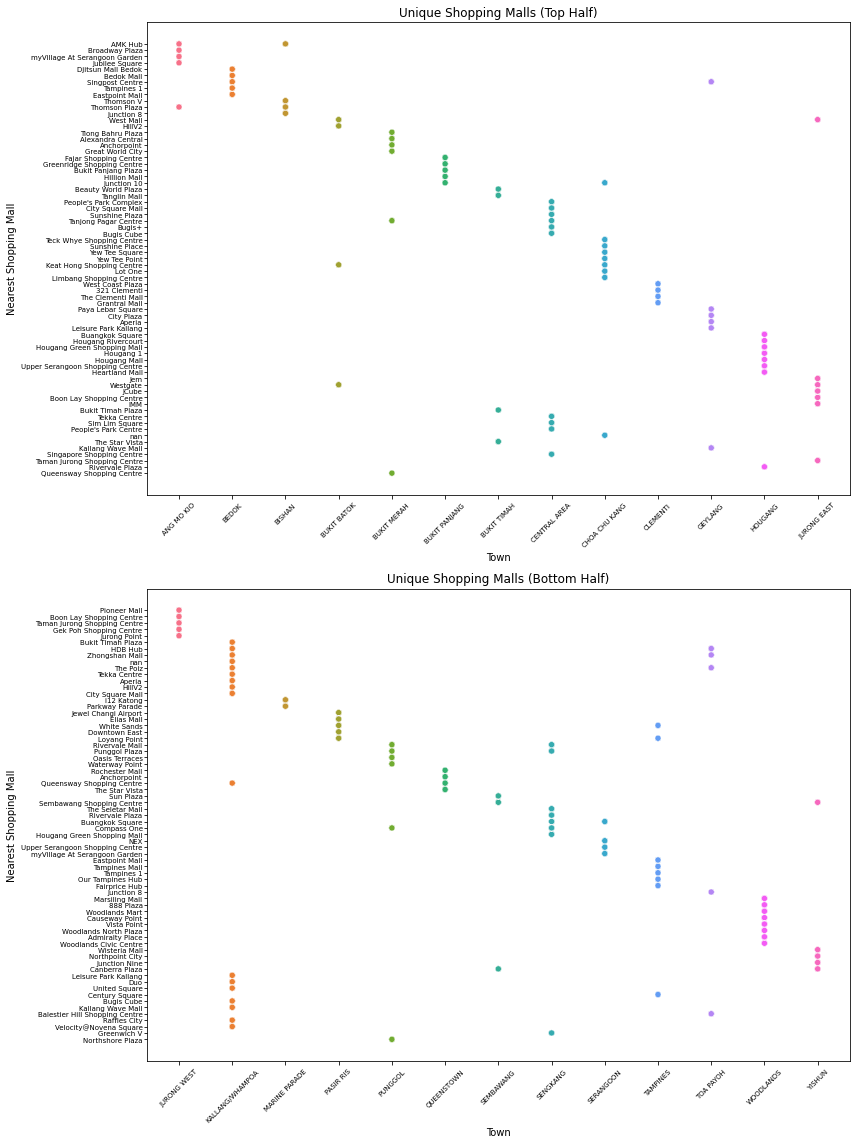

In [8]:
# Scatter plot is used to visualize the distribution of unique shopping malls for each town, 
# with towns represented on the x-axis and shopping malls represented on the y-axis.

df['NearestShoppingMall'] = df['NearestShoppingMall'].astype(str)

# Get unique shopping malls for each town
unique_shopping_malls = df.groupby('Town')['NearestShoppingMall'].unique()

# Split unique shopping malls into two halves for better readability
half_point = len(unique_shopping_malls) // 2
top_half = unique_shopping_malls.iloc[:half_point]
bottom_half = unique_shopping_malls.iloc[half_point:]

# Create two separate plots to prevent axes label overlapping
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot top half
sns.scatterplot(data=df[df['Town'].isin(top_half.index)], x='Town', y='NearestShoppingMall', ax=axes[0], hue='Town', legend=False)
axes[0].set_xlabel('Town')
axes[0].set_ylabel('Nearest Shopping Mall')
axes[0].set_title('Unique Shopping Malls (Top Half)')
axes[0].tick_params(axis='x', rotation=45) 
axes[0].tick_params(axis='x', labelsize=7) 
axes[0].tick_params(axis='y', labelsize=7, pad=1)  

# Plot bottom half
sns.scatterplot(data=df[df['Town'].isin(bottom_half.index)], x='Town', y='NearestShoppingMall', ax=axes[1], hue='Town', legend=False)
axes[1].set_xlabel('Town')
axes[1].set_ylabel('Nearest Shopping Mall')
axes[1].set_title('Unique Shopping Malls (Bottom Half)')
axes[1].tick_params(axis='x', rotation=45)  
axes[1].tick_params(axis='x', labelsize=7) 
axes[1].tick_params(axis='y', labelsize=7, pad=1)  

plt.tight_layout()
plt.xticks(rotation=45) 
plt.show()
